In [17]:
#Here we import the pandas and the numpy for working with the data set
import numpy as np
import pandas as pd

#here we read the csv file and import data from this
data = pd.read_csv(r"/content/flipkart_smartphones.csv",header='infer')
print(data) #Dispaly the cintent of dataset
print(data.info()) #This is use for the viewing the content on the dataset


      brand             model               colour  original_price  \
0      VIVO      VIVO T1 44W            Starry Sky           19990   
1     APPLE  APPLE IPHONE 11                 White           48900   
2      VIVO      VIVO T1 44W       Midnight Galaxy           20990   
3    XIAOMI       POCO M4 5G           Power Black           15999   
4    XIAOMI         REDMI 10       Caribbean Green           14999   
..      ...               ...                  ...             ...   
831  REALME  REALME GT NEO 2              NEO Blue           38999   
832  REALME  REALME GT NEO 2             NEO Black           38999   
833  REALME  REALME GT NEO 2             NEO Black           34999   
834  REALME   REALME X50 PRO              Rust Red           17999   
835  XIAOMI      POCO M2 PRO   Two Shades of Black           17999   

     discounted_price  ratings  rating_count  reviews  memory  storage  \
0               14499      4.5         87331     6044     4.0    128.0   
1          

In [20]:
#making different copies of our csv file using copy to perform various functions on it and keeping original csv as it is.
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()


print('The number of rows and columns in dataset are ',data.shape)

#using dropna function to delete the coloumns having null entries
data2 = data2.dropna(axis=1)
data3 = data3.dropna(axis=0)
print('The number of rows after NA values in coloumns are ',data2.shape)
print('The number of rows after NA values in rows are ',data3.shape)


The number of rows and columns in dataset are  (836, 16)
The number of rows after NA values in coloumns are  (836, 9)
The number of rows after NA values in rows are  (456, 16)


In [21]:
#Put the value of mean and mode according to the column
na_color = data1.loc[:,"colour"].mode()[0]
print("The mode of colour column",na_color)
data1.loc[data1["colour"].isna(),"colour"] = na_color

na_memory = np.mean(data1.loc[~data1["memory"].isna(),"memory"])
print("The mean of memory column",na_memory)
data1.loc[data1["memory"].isna(),"memory"] = na_memory

na_storage = np.mean(data1.loc[~data1["storage"].isna(),"storage"])
print("The mean of storage column",na_storage)
data1.loc[data1["storage"].isna(),"storage"] = na_storage

na_processor = data1.loc[:,"processor"].mode()[0]
print("The mode of processor column",na_processor)
data1.loc[data1["processor"].isna(),"processor"] = na_processor

na_front_camera = data1.loc[:,"front_camera"].mode()[0]
print("The mode of front camera column",na_front_camera)
data1.loc[data1["front_camera"].isna(),"front_camera"] = na_front_camera

na_battery_capacity = np.mean(data1.loc[~data1["battery_capacity"].isna(),"battery_capacity"])
print("The mean of battery capacity column",na_battery_capacity)
data1.loc[data1["battery_capacity"].isna(),"battery_capacity"] = na_battery_capacity

na_battery_type = data1.loc[:,"battery_type"].mode()[0]
print("The mode of battery type column",na_battery_type)
data1.loc[data1["battery_type"].isna(),"battery_type"] = na_battery_type

print(data1.info())
print(data1)


The mode of colour column Black
The mean of memory column 5.225891677675033
The mean of storage column 108.45853658536585
The mode of processor column Qualcomm Snapdragon 680
The mode of front camera column  16MP
The mean of battery capacity column 4950.9318766066835
The mode of battery type column Lithium
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             836 non-null    object 
 1   model             836 non-null    object 
 2   colour            836 non-null    object 
 3   original_price    836 non-null    int64  
 4   discounted_price  836 non-null    int64  
 5   ratings           836 non-null    float64
 6   rating_count      836 non-null    int64  
 7   reviews           836 non-null    int64  
 8   memory            836 non-null    float64
 9   storage           836 non-null    float64
 10  processor         

In [22]:
#Here describe() use for the knowing the statistial value of each numerical column like ,count,mean,standard deviaton,minimum,maximum etc...
print("Stastical value of each column")
print(data1.describe())

#For printing the statistics value i used the for loop for the short code
import statistics as st
column = ['original_price', 'discounted_price', 'ratings', 'rating_count', 'reviews', 'memory', 'storage', 'display_size', 'battery_capacity']
for i in column:
    mode = st.mode(data1[i])
    sum = np.sum(data1[i])
    median = np.median(data1[i])
    variance = np.var(data[i])
    range = np.max(data[i]) - np.min(data[i])
    print("Statistial Value For Column :",i)
    print("Mode :", mode)
    print("Sum :", sum)
    print("Median :", median)
    print("Variance :", variance)
    print("Range :", range)


Stastical value of each column
       original_price  discounted_price     ratings  rating_count  \
count      836.000000        836.000000  836.000000  8.360000e+02   
mean     26112.848086      21532.468900    4.272488  4.169612e+04   
std      23781.117479      21363.273113    0.284083  9.084175e+04   
min       4899.000000       3599.000000    0.000000  0.000000e+00   
25%      13999.000000       9999.000000    4.200000  9.227500e+02   
50%      17999.000000      14999.000000    4.300000  5.917500e+03   
75%      25999.000000      22992.250000    4.400000  3.995500e+04   
max     159900.000000     152999.000000    4.700000  1.171704e+06   

             reviews      memory     storage  display_size  battery_capacity  
count     836.000000  836.000000  836.000000    836.000000        836.000000  
mean     3144.740431    5.225892  108.458537     16.525179       4950.931877  
std      7524.617982    1.910066   68.508451      0.682189        484.308321  
min         0.000000    1.00000

In [23]:
#hare we print the unique value and length of each column
unique_brand = data1.loc[:,"brand"].unique()
print("Unique Value For Brand Column :",unique_brand)
print("Length Of Unique Value :",len(unique_brand))

unique_model = data1.loc[:,"model"].unique()
print("Unique Value For Model Column :",unique_model)
print("Length Of Unique Value :",len(unique_model))

unique_original_price = data1.loc[:,"original_price"].unique()
print("Unique Value For Original Price Column :",unique_original_price)
print("Length Of Unique Value :",len(unique_original_price))

unique_discounted_price = data1.loc[:,"discounted_price"].unique()
print("Unique Value For Discount Price Column :",unique_discounted_price)
print("Length Of Unique Value :",len(unique_discounted_price))

unique_ratings = data1.loc[:,"ratings"].unique()
print("Unique Value For Ratings Column :",unique_ratings)
print("Length Of Unique Value :",len(unique_ratings))

unique_rating_count = data1.loc[:,"rating_count"].unique()
print("Unique Value For Rating Count Column :",unique_rating_count)
print("Length Of Unique Value :",len(unique_rating_count))

unique_reviews = data1.loc[:,"reviews"].unique()
print("Unique Value For Review Column :",unique_reviews)
print("Length Of Unique Value :",len(unique_reviews))

unique_memory = data1.loc[:,"memory"].unique()
print("Unique Value For Memory Column :",unique_memory)
print("Length Of Unique Value :",len(unique_memory))

unique_storage = data1.loc[:,"storage"].unique()
print("Unique Value For Storage Column :",unique_storage)
print("Length Of Unique Value :",len(unique_storage))

unique_processor = data1.loc[:,"processor"].unique()
print("Unique Value For Processor Column :",unique_processor)
print("Length Of Unique Value :",len(unique_processor))

unique_rear_camera = data1.loc[:,"rear_camera"].unique()
print("Unique Value For Rear Camera Column :",unique_rear_camera)
print("Length Of Unique Value :",len(unique_rear_camera))

unique_front_camera = data1.loc[:,"front_camera"].unique()
print("Unique Value For Front Camera Column :",unique_front_camera)
print("Length Of Unique Value :",len(unique_front_camera))

unique_display_size = data1.loc[:,"display_size"].unique()
print("Unique Value For Display Size Column :",unique_display_size)
print("Length Of Unique Value :",len(unique_display_size))

unique_battery_capacity = data1.loc[:,"battery_capacity"].unique()
print("Unique Value For Battery Capacity Column :",unique_battery_capacity)
print("Length Of Unique Value :",len(unique_battery_capacity))

unique_battery_type = data1.loc[:,"battery_type"].unique()
print("Unique Value For Battery Type Column :",unique_battery_type)
print("Length Of Unique Value :",len(unique_battery_type))


Unique Value For Brand Column : ['VIVO' 'APPLE' 'XIAOMI' 'INFINIX' 'MOTOROLA' 'REALME' 'SAMSUNG' 'OPPO'
 'ONEPLUS' 'GOOGLE' 'NOTHING' 'I KALL' 'IQOO' 'MICROMAX' 'ITEL' 'TECNO'
 'NOKIA' 'LAVA' 'MARQ']
Length Of Unique Value : 19
Unique Value For Model Column : ['VIVO T1 44W ' 'APPLE IPHONE 11 ' 'POCO M4 5G ' 'REDMI 10 ' 'POCO C31 '
 'INFINIX HOT 20 PLAY ' 'REDMI 9I SPORT ' 'MOTOROLA G52 '
 'MOTOROLA G62 5G ' 'REALME C30 ' 'POCO M4 PRO ' 'MOTOROLA G32 '
 'SAMSUNG GALAXY F13 ' 'APPLE IPHONE 14 ' 'POCO M4 PRO 5G '
 'MOTOROLA G31 ' 'SAMSUNG GALAXY F23 5G ' 'INFINIX NOTE 12I '
 'INFINIX HOT 12 ' 'INFINIX SMART 6 HD ' 'MOTOROLA E40 ' 'MOTOROLA E13 '
 'REALME C30 - LOCKED WITH AIRTEL PREPAID ' 'POCO X4 PRO 5G '
 'SAMSUNG GALAXY F04 ' 'OPPO A17K ' 'REALME 10 PRO+ 5G ' 'REDMI NOTE 10S '
 'MOTOROLA G82 5G ' 'POCO C50 ' 'VIVO T1X ' 'REDMI 10A '
 'REDMI NOTE 11 SE ' 'ONEPLUS NORD CE 2 LITE 5G ' 'REALME C33 '
 'GOOGLE PIXEL 6A ' 'REALME NARZO 50 ' 'OPPO F19 PRO+ 5G ' 'OPPO K10 5G '
 'MOTOROLA G22 ' 

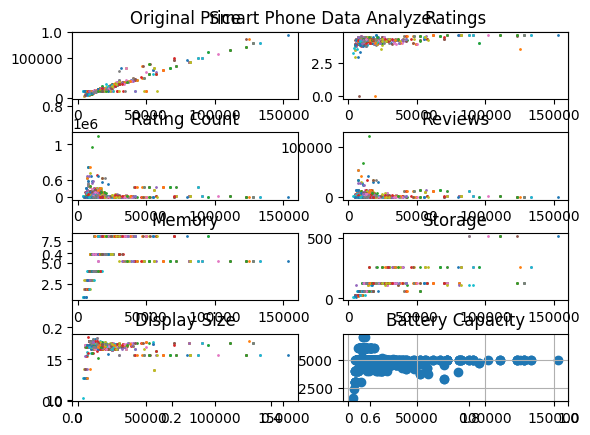

In [25]:
#For plot graph we import the library of matplotlib
import matplotlib.pyplot as plt
plt.title('Smart Phone Data Analyze')
#here we used the subplot method
plt.subplot(4,2,1)
plt.plot([data1["discounted_price"]],[data1["original_price"]],marker='o',markersize=1)
plt.title('Original Price')

plt.subplot(4,2,2)
plt.plot([data1["discounted_price"]],[data1["ratings"]],marker='o',markersize=1)
plt.title('Ratings')

plt.subplot(4,2,3)
plt.plot([data1["discounted_price"]],[data1["rating_count"]],marker='o',markersize=1)
plt.title('Rating Count')

plt.subplot(4,2,4)
plt.plot([data1["discounted_price"]],[data1["reviews"]],marker='o',markersize=1)
plt.title('Reviews')

plt.subplot(4,2,5)
plt.plot([data1["discounted_price"]],[data1["memory"]],marker='o',markersize=1)
plt.title('Memory')

plt.subplot(4,2,6)
plt.plot([data1["discounted_price"]],[data1["storage"]],marker='o',markersize=1)
plt.title('Storage')

plt.subplot(4,2,7)
plt.plot([data1["discounted_price"]],[data1["display_size"]],marker='o',markersize=1)
plt.title('Display Size')

plt.subplot(4,2,8)
plt.scatter([data1["discounted_price"]],[data1["battery_capacity"]])
plt.title('Battery Capacity')

plt.subplots_adjust(hspace=0.5)
plt.grid()
plt.show()


Text(0.5, 0, 'Discount Price')

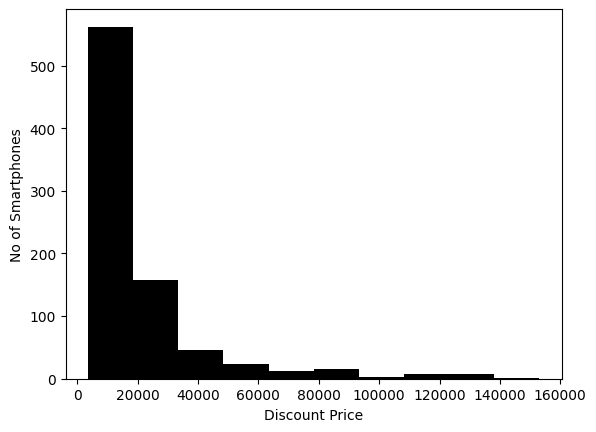

In [26]:
#here we plot the histogram of Discount price
plt.hist(data1['discounted_price'],color='k')
plt.ylabel("No of Smartphones")
plt.xlabel("Discount Price")


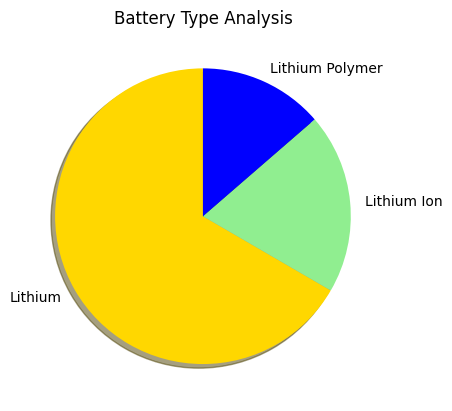

In [27]:
#here we plot the pie chart of Battery Type
maritial = data1["battery_type"].value_counts()

label = maritial.index
counts = maritial.values
colors = ['gold','lightgreen','blue']
plt.title('Battery Type Analysis')

plt.pie(counts, labels = label, startangle = 90,shadow=True, colors=colors)
plt.show()



Enter the number of nearest neighbors to be used, i.e. k :3


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Accuracy :  0.8869047619047619
              precision    recall  f1-score   support

        2400       0.00      0.00      0.00         1
        3000       1.00      1.00      1.00         1
        3020       0.00      0.00      0.00         0
        3300       1.00      1.00      1.00         1
        4000       0.50      0.20      0.29         5
        4020       0.67      1.00      0.80         2
        4200       1.00      1.00      1.00         1
        4250       0.00      0.00      0.00         2
        4300       0.00      0.00      0.00         0
        4410       1.00      1.00      1.00         1
        4500       0.80      0.57      0.67         7
        4600       1.00      1.00      1.00         1
        4610       1.00      1.00      1.00         1
        4700       1.00      0.67      0.80         3
        4800       1.00      1.00      1.00         1
        4950       1.00      1.00      1.00         9
        4980       1.00      1.00      1.00       

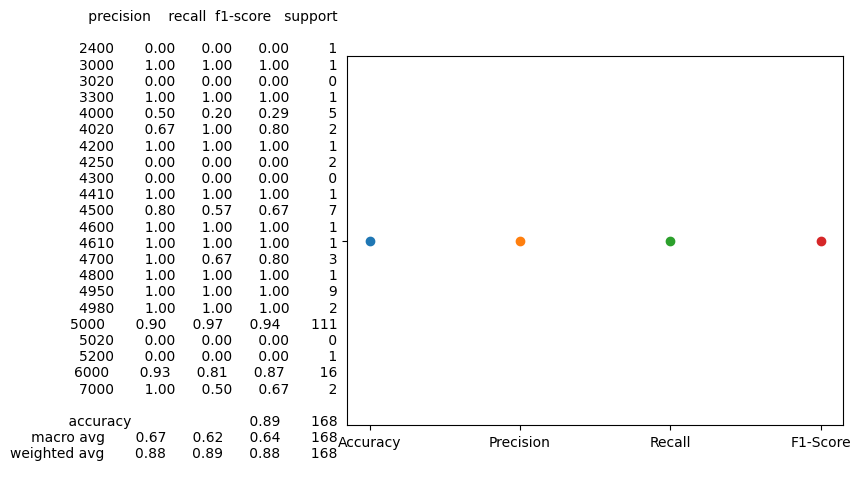

In [32]:
#Here first we done the trainig  & testing and then we apply the classification
#Here we classify the Batttery type
from sklearn.model_selection import train_test_split
selected_columns = ['original_price', 'discounted_price', 'ratings', 'rating_count', 'reviews', 'memory','display_size']

X = data1[selected_columns].astype(float)
Y = data1['battery_capacity']

X = X.values.tolist()
X = np.array(X,dtype=float)
Y = np.array(Y,dtype=int)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)
from sklearn.metrics import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier

k = int(input("Enter the number of nearest neighbors to be used, i.e. k :"))

model = KNeighborsClassifier(n_neighbors=k, weights='distance')

model.fit(X_train,Y_train)

pred = model.predict(X_test)

accuracy = accuracy_score(Y_test,pred)
cr=classification_report(Y_test,pred)
plt.scatter(['Accuracy'],[cr],label='Accuracy')
plt.scatter(['Precision'],[cr],label='Precision')
plt.scatter(['Recall'],[cr],label='Recall')
plt.scatter(['F1-Score'],[cr],label='F1-score')

print("Accuracy : ",accuracy)
print(classification_report(Y_test,pred))



Using Sklearn:
Mean Absolute Error (MAE) : 0.09772472180398911
Mean Squared Error (MSE) : 0.06578611349163402
Root Mean Squared Error (RMSE) : 0.09772472180398911


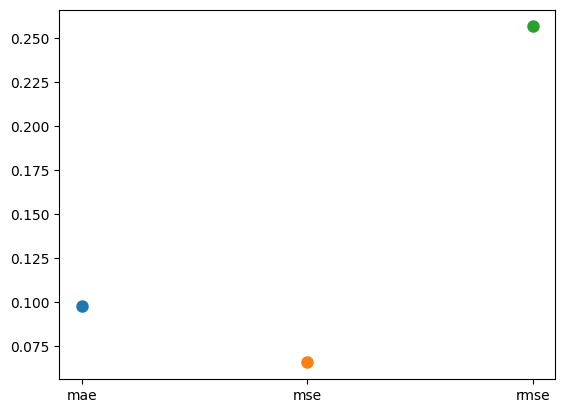

In [29]:
#here we do the regrasssion of battery capacity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error ,mean_squared_error


selected_columns = ['original_price', 'discounted_price', 'ratings', 'rating_count', 'reviews', 'memory','battery_capacity']

X = data1[selected_columns].astype(float)
Y = data1['display_size']

X = X.values.tolist()
X = np.array(X,dtype=float)
Y = np.array(Y,dtype=float)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

model = KNeighborsRegressor(n_neighbors=k, weights='distance')

model.fit(X_train,Y_train)

pred = model.predict(X_test)

mae = mean_absolute_error(Y_test,pred)
mse = mean_squared_error(Y_test,pred)
rmse = np.sqrt(mse)

plt.plot(['mae'],[mae],marker='o',markersize=8,label='MAE')
plt.plot(['mse'],[mse],marker='o',markersize=8,label='MSE')
plt.plot(['rmse'],[rmse],marker='o',markersize=8,label='RMSE')

print("Using Sklearn:")
print("Mean Absolute Error (MAE) :",mae)
print("Mean Squared Error (MSE) :",mse)
print("Root Mean Squared Error (RMSE) :",mae)
